In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [83]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Data_Activity_Projection.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,11,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,6,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,3,10,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10,1


In [84]:
df1 = df0.drop(columns=["Sum_Skills_Off_ab_avg", "Total_Skills"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,11
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,10
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10


In [85]:
print(df1.sum(axis=0))


Agriculture        111
Animal Care        108
Art                106
Beauty             117
Dance              101
Music              111
Writing            114
Language           106
Health             121
Sports             122
Food               134
Technology         120
Photo              109
Video              121
Sum_Skills_Off    7753
dtype: int64


In [86]:
df1.shape

(800, 15)

# 1. KNN Regressor model

## 1.1 Model training

In [87]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]
knn = KNeighborsRegressor(n_neighbors= 10)
y_pred = cross_val_predict(knn, X, y, cv =5)

In [88]:
y_pred

array([[ 9.8],
       [10.4],
       [ 8.8],
       [ 8.7],
       [ 8.7],
       [10.2],
       [10.3],
       [11.1],
       [ 8.7],
       [ 9.4],
       [10.2],
       [ 9.8],
       [ 8.7],
       [ 8. ],
       [ 9.6],
       [10.7],
       [ 8.7],
       [10. ],
       [ 9.5],
       [10.2],
       [ 9.5],
       [ 8.7],
       [ 7.7],
       [11.3],
       [ 8.7],
       [ 9.4],
       [ 7.3],
       [ 8.5],
       [ 7.3],
       [10.4],
       [ 9.4],
       [10.4],
       [10.4],
       [10.4],
       [10.5],
       [ 9.5],
       [10.2],
       [10.4],
       [ 8. ],
       [10.1],
       [10.2],
       [ 8.2],
       [ 9.4],
       [10.1],
       [10.2],
       [10.4],
       [ 9.4],
       [ 9.5],
       [ 9.5],
       [10.3],
       [ 9.5],
       [ 8.3],
       [ 8.4],
       [ 8.9],
       [ 9.4],
       [ 8.6],
       [ 7.6],
       [ 8.4],
       [11.7],
       [ 8.7],
       [12.1],
       [ 8.8],
       [ 8.7],
       [11.4],
       [ 7.3],
       [10.4],
       [10

In [89]:
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

17.5853125
4.193484529600652
-0.12252000784744665


In [90]:
error = []
for k in range (1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X,y, cv=5)
    error.append(mean_squared_error(y,y_pred))

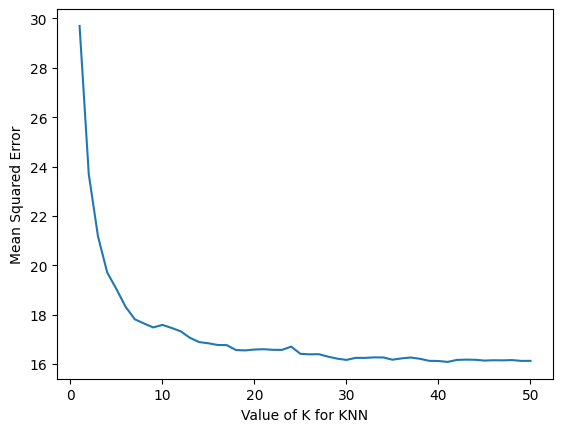

In [91]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.plot(range(1,51),error)

## 1.2 Scaling

In [92]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [93]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)

print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))

17.3378625
4.16387589872705
-0.10672457765865406


In [94]:
error_scaled = []
for k in range (1,100):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
    error_scaled.append(mean_squared_error(y,y_pred))

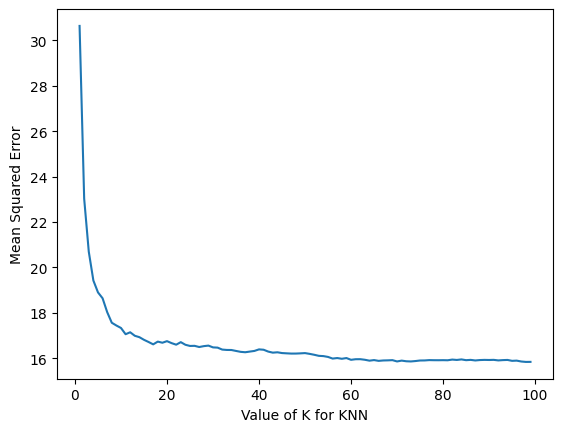

In [95]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.plot(range(1,100),error_scaled)

## 1.3 Cross validation / Hyperparameter tuning

In [96]:
cv = KFold(n_splits=5, random_state= None, shuffle=False) 

In [97]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))


17.3378625
4.16387589872705
-0.10672457765865406


In [98]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=512))
y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))


15.688613176345825
3.960885403081718
-0.0014483499128759014


## 1.4 Train model with best K value

In [99]:
final_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=512))
y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
final_model.fit(X, y)

print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))

15.688613176345825
3.960885403081718
-0.0014483499128759014


# 2. Prepare Model for API 

In [100]:
import pickle

In [101]:
with open('Activity_Projection_Model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
